<a href="https://colab.research.google.com/github/blckpwdr50/datasciencecoursera/blob/master/TRAIN_HS_PD_Lab_6_%5BDaniel_Schaben%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Linear Regression**
---

### **Description**
In this lab, you will practice implementing linear regression models on multiple datasets.

</br>

### **Lab Structure**
**Part 1**: [Boston Housing Dataset](#p1)

**Part 2**: [Diabetes Dataset](#p2)

**Part 3**: [California Housing Dataset](#p3)

**Part 4**: [[OPTIONAL] CO2 Emissions Dataset](#p4)

**Part 5**: [[OPTIONAL] Bikes Dataset](#p5)

</br>

### **Goals**
 By the end of this lab, you will:
* Implement a linear regression model on your own
* Test and use linear regression models to predict disease progression and housing prices

</br>

### **Cheat Sheets**
* [Linear Regression with sklearn](https://docs.google.com/document/d/1aymYoakMDdvRZJS4-NBCF5D54f4RQlCJFimz8Mf-uJI/edit?usp=drive_link)

<br>

**Run the cell below to import the necessary libraries and functions.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<a name="p1"></a>

---
## **Part 1: Boston Housing Dataset**
---

#### **About the Dataset**
For a long time, House Price Index (HPI), which measures price changes of residential housing, has been used to predict the price of a specific house. However, HPI is focused on measuring the average price changes in repeat sales or refinancing on the same properties over time, meaning that many features, such as the house's district, age, or number or floors, are not considered. As a result of HPI's deficiencies, in recent years, Machine Learning techniques have been used to predict individual housing prices.


The Boston Housing Dataset is a collection of data that contains information on various features of houses in the Boston area, such as the number of rooms, the age of the house, and the distance to employment centers. The dataset contains 13 numerical features and a numerical target. It is often used for regression analysis and is a popular benchmark dataset for machine learning algorithms.

The features are as follows:

* `crim`: Per capita crime rate by town
* `zn`: Proportion of residential land zoned for lots over 25,000 sq. ft
* `indus`: Proportion of non-retail business acres per town
* `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* `nox`: Nitric oxide concentration (parts per 10 million)
* `RM`: Average number of rooms per dwelling
* `age`: Proportion of owner-occupied units built prior to 1940
* `dis`: Weighted distances to five Boston employment centers
* `rad`: Index of accessibility to radial highways
* `tax`: Full-value property tax rate per 10,000 dollars
* `ptratio`: Pupil-teacher ratio by town
* `b`: 1000(Bk — 0.63)², where Bk is the proportion [of people of African American descent] by town
* `LSTAT`: Percentage of lower status of the population
* **`TARGET`** (target that needs to be added): Median value of owner-occupied homes in $1000s. *You need to add this column after loading the Boston data from sklearn datasets*.

<br>

**NOTE:** The Boston housing prices dataset has a noted ethical problem: the authors of this dataset engineered a non-invertible variable “B” assuming that racial self-segregation had a positive impact on house prices. This variable is likely due to the practice of ['Redlining'](https://www.wgbh.org/news/local-news/2019/11/12/how-a-long-ago-map-created-racial-boundaries-that-still-define-boston) from the 1930s to 1970s in Boston, which has had long lasting affects in Boston still present today. The goal of the research that led to the creation of this dataset was to study the impact of air quality, but it did not give adequate demonstration of the validity of this assumption. Please know this data set is used for *practice only* and can serve as a good example of why ethical standards are so important for ML models and implementation. [Read more](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8) on problems existing within this data set and why it is not used for anything other than practicing ML.

<br>

#### **Your Task**
Using the Boston Housing dataset, we will do the following:
* Build a model that will predict the median value of owner-occupied homes for Boston in the 1970s;
* Use the model to predict the median value of houses with various room numbers and LSTAT scores.


### **Step #1: Load the data**


In [ ]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df = df.rename(columns={'medv': 'TARGET', 'rm': 'RM', 'lstat':'LSTAT'})
df.head()

,crim,zn,indus,chas,nox,RM,age,dis,rad,tax,ptratio,b,LSTAT,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### **Step #2: Decide independent and dependent variables**


We are going to use "Rooms per dwelling" (`RM`) and "Percentage of lower status of the population" (`LSTAT`) as our independent variables for predicting `TARGET`. Our target is the median value of owner-occupied homes. **With these values, we are building a housing value predictor for Boston in the 1970s.** This step has already been done for you.

In [ ]:
df[["RM","LSTAT", "TARGET"]]

,RM,LSTAT,TARGET
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0



**Before we continue, we will create two graphs. One with `LSTAT` and the target, and another with `RM` and the target to explore the relationship between the variables further.**

Text(0, 0.5, 'target')

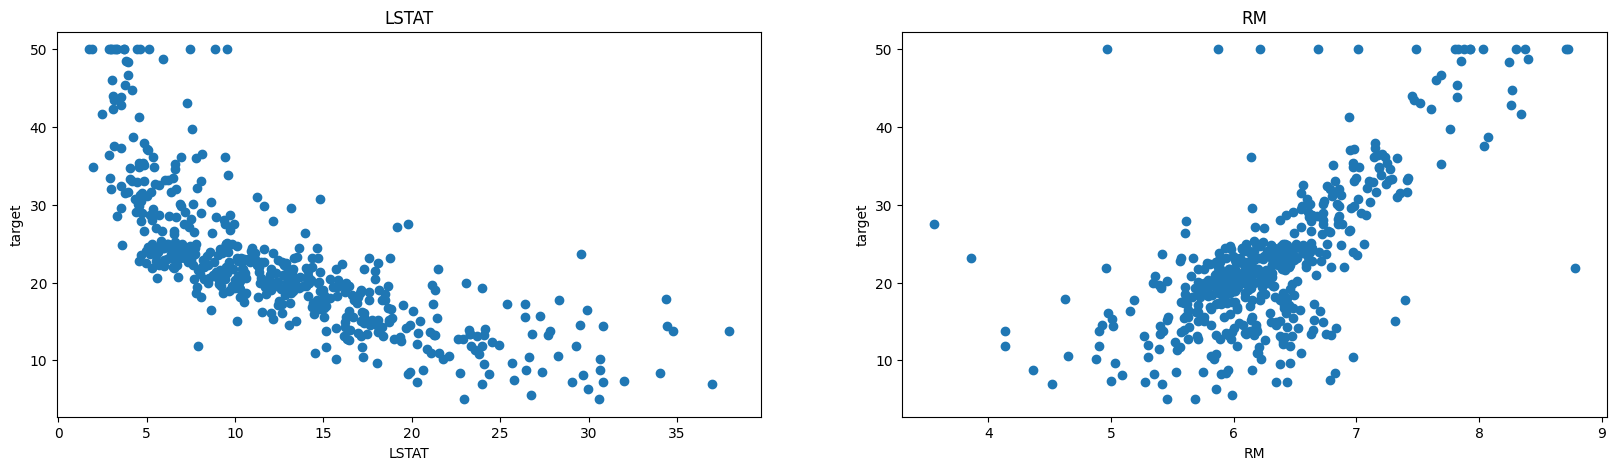

In [ ]:
plt.figure(figsize=(20, 5))

features = df[['RM','LSTAT']]
target = df[['TARGET']]

plt.subplot(1, 2, 1)
x = df["LSTAT"]
y = target
plt.scatter(x, y, marker='o')
plt.title("LSTAT")
plt.xlabel("LSTAT")
plt.ylabel('target')

plt.subplot(1, 2, 2)
x = df["RM"]
y = target
plt.scatter(x, y, marker='o')
plt.title("RM")
plt.xlabel("RM")
plt.ylabel('target')

### **Step #3: Split data into training and testing data**

Specifically ensure the test set is 20% of the overall data. This will be the assumption moving forward.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size=0.2, random_state=42)
print(X_train)

        RM  LSTAT
477  5.304  24.91
15   5.834   8.47
332  6.031   7.83
423  6.103  23.29
19   5.727  11.28
..     ...    ...
106  5.836  18.66
270  5.856  13.00
348  6.635   5.99
435  6.629  23.27
102  6.405  10.63

[404 rows x 2 columns]


### **Step #4: Import your algorithm**


In [ ]:
# import that LinearRegression algorithm
from sklearn.linear_model import LinearRegression

### **Step #5: Initialize your model and set hyperparameters**


Linear regression takes no hyperparameters, so we only need to initialize the model.

In [ ]:
reg = LinearRegression()# COMPLETE THIS CODE

### **Step #6: Fit your model, test on the testing data, and create a visualization if applicable**

In [ ]:
# fit
reg.fit(X_train, y_train)

# predict
pred = reg.predict(X_test)

#### **Create a visualization**

Use `y_test` and your `prediction` (x and y on graph) from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be:
```
plt.plot([0, 50], [0, 50], '--k', label="Correct prediction")
```

This step has already been done for you.

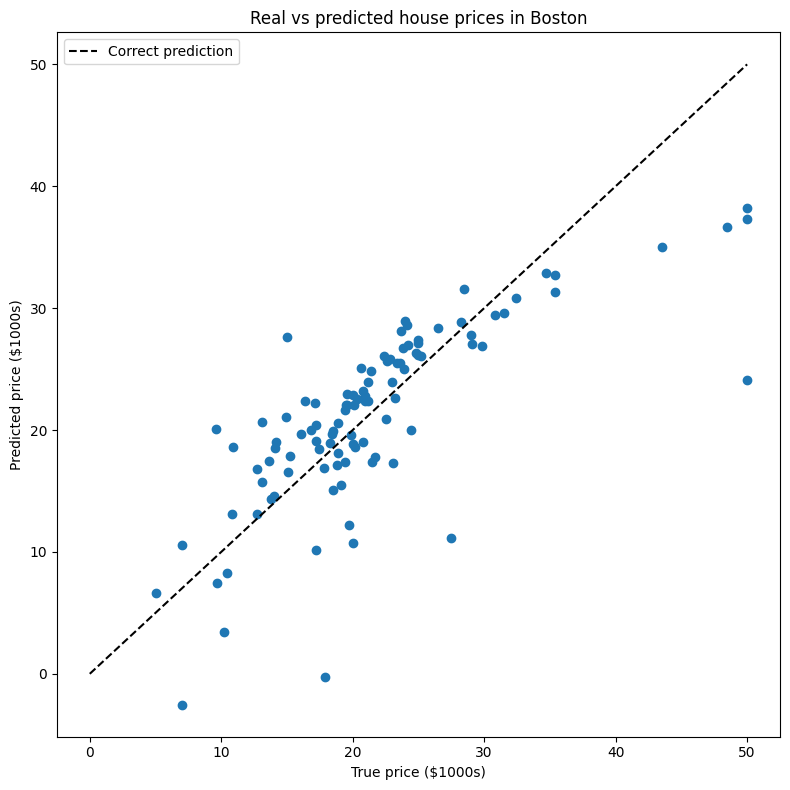

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred)
plt.plot([0, 50], [0, 50], '--k', label="Correct prediction")
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.title("Real vs predicted house prices in Boston")
plt.legend()
plt.tight_layout()

### **Step #7: Evaluate your model**


Use mean squared error and the R2 score as the evaluation metrics.

In [ ]:
print('mean squared: ', mean_squared_error(y_test, pred))
print('R2 score: ', r2_score(y_test, pred))

mean squared:  31.243290601783627
R2 score:  0.5739577415025858


### **Step #8: Use the model**

Using the model we created, predict the price of three houses in Boston:

* House 1:  7 rooms and LSTAT is 5.0%

* House 2:  6 rooms and LSTAT is 4.0%

* House 3: 8 rooms and LSTAT is 15.0%

**Note:** you must create a dataframe containing with the information of the new houses:

```python
new_houses = pd.DataFrame(enter_new_house_data_here, columns = ["RM", "LSTAT"])
```

This `new_houses` variable can then be placed directly into the `model.predict()` function.

In [ ]:
new_houses = pd.DataFrame([[7,5], [6,4], [8, 15]], columns =["RM", "LSTAT"])
new_prediction = reg.predict(new_houses)
print(new_prediction)

[[31.25202152]
 [26.41942131]
 [30.39213466]]


### **Reflection questions**
Answer the following questions:

1. How well did our model perform?
2. Would you rather buy House 1, House 2, or House 3? Why?

<a name="p2"></a>

---
## **Part 2: Diabetes Dataset**
---
#### **About the Dataset**
Diabetes is the 8th leading cause of death in the United States. More than 37 milion people in the U.S. have diabetes, and one in 5 of these individuals do not know it. This dataset contains data from diabetic patients with features such as their BMI, age, blood pressure, and glucose levels, which are useful in predicting the diabetes disease progression in patients. We will be looking at these variables to help predict disease progression in diabetic patients.

The features are as follows:
* `AGE`: age (in years)
* `SEX`
* `BMI`: body mass index
* `BP`: average blood pressure
* `S1`: tc, total serum cholesterol
* `S2`: ldl, low-density lipoproteins
* `S3`: hdl, high-density lipoproteins
* `S4`: tch, total cholesterol / HDL
* `S5`: ltg, possibly log of serum triglycerides level
* `S6`: glu, blood sugar level
* `Y`: quantitative measure of disease progression one year after baseline

**Note:** Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of the number of samples (i.e. the sum of squares of each column totals 1).

#### **Your Task**
Using the Diabetes dataset, you will do the following:
* Build a model that will predict disease progression in diabetic patients;
* Predict the disease progression of a patient with various ages, BMIs, and blood pressures.

### **Step #1: Load the data**

In [ ]:
file = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
df = pd.read_table(file, header=0, delim_whitespace=True)
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


### **Step #2: Decide independent and dependent variables**

Here we would like to use the `AGE` `BMI` and `BP` columns as our independent variables and `Y` as our dependent variable.

We are building a predictor of disease progression.


In [ ]:
features = df[['AGE','BMI','BP']]
taget = df['Y']

### **Step #3: Split data into training and testing data**

Use `AGE`, `BMI`, and `BP` for our independent variables.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[['AGE', 'BMI', 'BP']], df['Y'], test_size=0.2, random_state=42)

### **Step #4: Import your model**

In [ ]:
from sklearn.linear_model import LinearRegression# COMPLETE THIS CODE

### **Step #5: Initialize your model and set hyperparameters**


Linear regression takes no hyperparameters, so just initialize the model.

In [ ]:
LR=LinearRegression()

### **Step #6: Fit your model, test on the testing data, and create a visualization if applicable**

In [ ]:
LR.fit(X_train, y_train)
pred = LR.predict(X_test)
print(pred)

[142.68971146 195.42106239 146.68007936 230.03428937 134.6282183
 121.68473326 299.62593312 197.0046887   50.00968226 154.30582497
 113.32308335  94.88157621  86.2981343  188.68832359 103.65888852
 152.6618995  216.56132398 255.59688838 200.56029693 229.66083612
 168.36821363  97.82666377  94.56950011 192.59556339 178.63748531
 181.88916132 224.44699041 163.84116813  67.90331671 131.28485344
 210.75155255 105.42071229 135.27355298 158.82766835 168.1934186
 233.18378128 115.39867348 116.99790453 130.87156176  82.49481012
  88.54406352 151.839682   146.01329859 120.70688618 129.27470144
 111.4423734   88.34751498 110.2744095   69.81262874 138.66358548
 184.35422632  63.02916131 155.09149192 112.62155429 164.68204156
 203.88700097  99.46104061 213.51095987 120.09772643  74.53145942
 173.9162839  174.19499456 186.74803876 138.94802548  79.74291249
 194.93008645 160.9260874  155.21035619  92.24044279 122.66973634
 136.13824323 197.22408807 170.04647053 134.41865051  88.62174779
 130.0122934

#### **Create a visualization**

Use `y_test` and your `prediction` from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be. The code has already been given to you.
```
plt.plot([0, 300], [0, 300], '--k', label="Correct prediction")
```

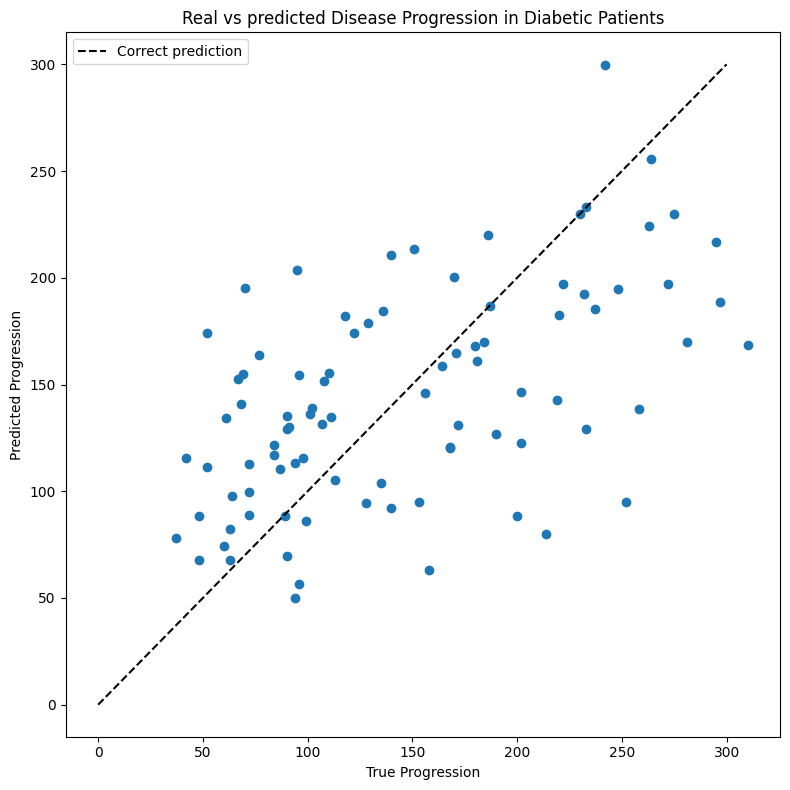

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred)
plt.plot([0, 300], [0, 300], '--k', label="Correct prediction")
plt.axis('tight')
plt.xlabel('True Progression')
plt.ylabel('Predicted Progression')
plt.title("Real vs predicted Disease Progression in Diabetic Patients")
plt.legend()
plt.tight_layout()

### **Step #7: Evaluate your model**

Use mean squared error and the R2 score as the evaluation metrics.


In [ ]:
from sklearn.metrics import mean_squared_error
print('mean squared: ', mean_squared_error(y_test, pred))
from sklearn.metrics import r2_score
print('r squared: ', r2_score(y_test, pred))

mean squared:  3756.8366496443828
r squared:  0.2909156196410876


### **Step #8: Use the model**

Using the model we created, predict the disease progression of two new patients:

* Patient 1:  age 45, bmi of 26.3, and average blood pressure of 98

* Patient 2:  age 39, bmi of 22.7, and average blood pressure of 114

**Note:** you must create a dataframe containing with the information of the new patients:

```python
new_patient_data = pd.DataFrame(new_patient_data_here, columns =["AGE", "BMI", "BP"])
```

In [ ]:
# Prediction
new_patient_data = pd.DataFrame([[45, 26.3, 98],[39, 22.7, 114]], columns = ["AGE", "BMI", "BP"])
disease_prediction = LR.predict(new_patient_data)
print('prediction: ', disease_prediction)

prediction:  [154.85468555 142.30161944]


### **Reflection questions**
Answer the following questions based on the scatter plot:

1. Does your model tend to overpredict or underpredict for a true progression value less than 150?
2. Does your model tend to overpredict or underpredict for a true progression value above 150?

<a name="p3"></a>

---
## **Part 3: California Housing Dataset**
---

#### **About the Dataset**
The price of a home in California is nearly double the national average. The California Housing Dataset is a collection of data containing information on the median house value and other features of census block groups in California. This dataset was derived from the 1990 U.S. Census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The features are as follows:
* `MedInc`: median income in block group (in hundreds of thousands of dollars, i.e. \$100,000)
* `HouseAge`: median house age in block group
* `AveRooms`: average number of rooms per household
* `AveBedrms`: average number of bedrooms per household
* `Population`: block group population
* `AveOccup`: average number of household members
* `Latitude`: block group latitude
* `Longtitude`: block group longitude
* `TARGET`: median house value for California districts (in hundreds of thousands of dollars, i.e. $100,000)

#### **Your Task**
Using the California Housing dataset, you will do the following:
*  Make a model that will predict the median house value in California in 1990
* Predict the median house value for a specific home.

As you build your model, try using different features for your model and see how the accuracy changes.


### **Step #1: Load the data**


In [ ]:
#import relevant packages
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1
cali_data = fetch_california_housing()
df = pd.DataFrame(data=cali_data.data, columns=cali_data.feature_names)
df['TARGET'] = cali_data.target


### **Step #2: Decide independent and dependent variables**

The dependent variable will be the `TARGET`, so find the best independent variables using `.var()` and `.corr()`. `.var` shows the variance for each variable, and in general lower values tend to be better. `.corr()` shows a correlation matrix between each pair of variables, so looking at the `TARGET` row or column can tell you how much variables are correlated with `TARGET`.

In [ ]:
df.var()# var

MedInc        3.609323e+00
HouseAge      1.583963e+02
AveRooms      6.121533e+00
AveBedrms     2.245915e-01
Population    1.282470e+06
AveOccup      1.078700e+02
Latitude      4.562293e+00
Longitude     4.014139e+00
TARGET        1.331615e+00
dtype: float64

In [ ]:
df.corr()# corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
TARGET,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### **Steps #3-6: Split data, import/initialize your model, fit the model, make a prediction, and create a visualization**

In [ ]:
# 2 - nothing to do here, we used HouseAge, AveBedrms, Latitude, and Longitude

# 3
X_train, X_test, y_train, y_test = train_test_split(df[['HouseAge',	'AveBedrms','Latitude',	'Longitude']], df['TARGET'], test_size=0.2)

# 4 - 6
LR2 = LinearRegression()
LR2.fit(X=X_train, y=y_train)
test_pred = LR2.predict(X_test)

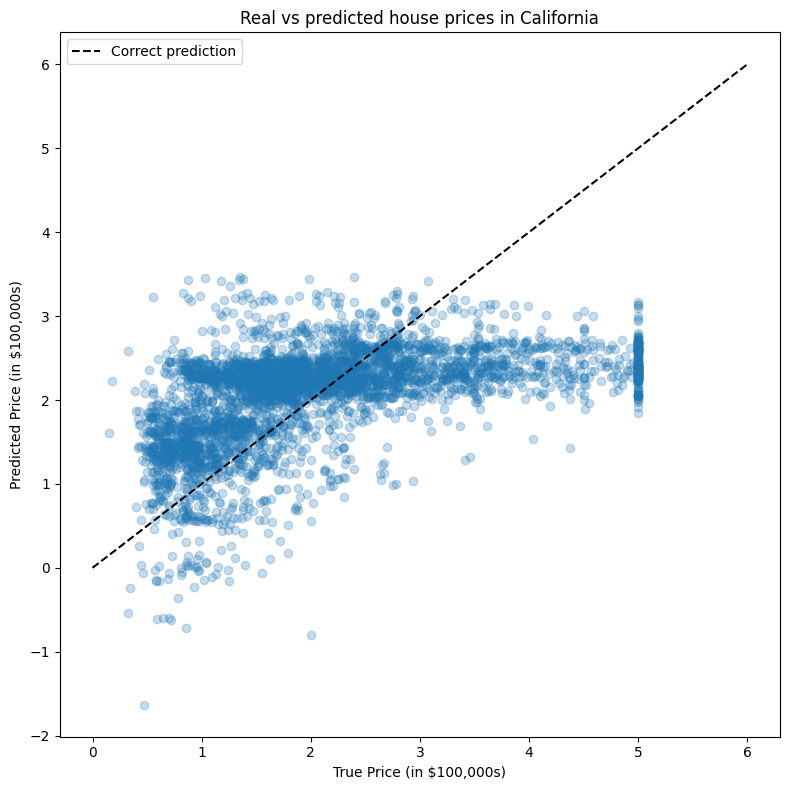

In [ ]:
# 6 part two: visualization

plt.figure(figsize=(8, 8))
plt.scatter(y_test, test_pred, alpha = 0.25)
plt.plot([0, 6], [0, 6], '--k', label="Correct prediction")
plt.axis('tight')
plt.xlabel('True Price (in $100,000s)')
plt.ylabel('Predicted Price (in $100,000s)')
plt.title("Real vs predicted house prices in California")
plt.legend()
plt.tight_layout()






### **Steps #7-8: Evaluate and use the model**

Use mean squared error as the evaluation metric. Then use the model to predict the median house value for a home that is 51 years old, has an average of 7.2 bedrooms, and is at 38.1 latitude and -121.08 longitude.

In [ ]:
# 7
print('mean squared: ', mean_squared_error(y_test, test_pred))

# 8
prediction = LR2.predict(pd.DataFrame([[51, 7.2, 38.1, -121.08]],
                         columns=['HouseAge',	'AveBedrms','Latitude',	'Longitude']))
print('prediction: ', prediction)


# 8

mean squared:  1.0106359459894831
prediction:  [2.24023525]


### **Step #9: Using Different Features**

This time, use `MedInc`, `HouseAge`, `AveRooms`, and `AveBedrms` as the independent variables. Create a linear regression model, and evaluate it using mean squared error as the metric. Then predict the median house value for a home where the median income is $200,000, the house is 51 years old, there are 11.4 average rooms, and 7.2 average bedrooms. Observe the difference in this model's accuracy and prediction.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['MedInc',	'HouseAge','AveRooms','AveBedrms']], df['TARGET'], test_size=0.2)
LR2=LinearRegression()
LR2.fit(X=X_train, y=y_train)
test_pred = LR2.predict(X_test)

# 7
print('mean squared: ', mean_squared_error(y_test, test_pred))

better_prediction = LR2.predict(pd.DataFrame([[200000, 51, 11.4, 7.2]],
                         columns=['MedInc',	'HouseAge','AveRooms','AveBedrms']))
print('prediction: ', better_prediction)


mean squared:  0.6639176699891477
prediction:  [109223.44665981]


### **Reflection question**
Answer the following question:

1. Which 3 features have the highest correlation with `TARGET`?
2. What were some differences in how your two models performed?

<a name="p4"></a>

---
## **Part 4: [OPTIONAL] CO2 Emissions Dataset**
---

#### **About the Dataset**
Since 1970, CO2 emissions have increased by nearly 90%. These elevated CO2 levels cause poor air quality and contribute to climate change. Globally, cars and other transportation vehicles are responsible for about 29% of overall CO2 emissions. This CO2 emissions dataset is a collection of data from cars that contains information on the car's make, model, volume, weight, and how much CO2 it emits.

The features are as follows:
* `Car`: name of car brand
* `Model`: name of car model
* `Volume`: engine size (in cm^3)
* `Weight`: weight of car (in kg)
* `CO2`: amount of CO2 emitted (in g/km)

#### **Your Task**
Using the CO2 Emissions dataset, you will do the following:
* Build a model that will predict the CO2 emissions of a car;
* Predict the CO2 emissions of a car with a specific volume and weight.


### **Step #1: Load the data**

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN/main/emissions/car_emissions.csv"
cars_df = pd.read_csv(url)
cars_df.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


### **Step #2: Decide independent and dependent variables**

We are going to use `Volume` and `Weight` as our independent variables for predicting `CO2` emissions.



In [ ]:

features = cars_df[['Volume','Weight']]
target= cars_df['CO2']

### **Step #3: Split data into training and testing data**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2)

### **Step #4: Import your algorithm**


In [ ]:
from sklearn.linear_model import LinearRegression

### **Step #5: Initialize your model and set hyperparameters**

Linear regression takes no hyperparameters, so just initialize the model.

In [ ]:
LR3=LinearRegression()



### **Step #6: Fit your model, test on the testing data**

In [ ]:
LR3.fit(X=X_train, y=y_train)
test_pred = LR3.predict(X_test)

### **Step #7: Evaluate your model**

Use mean squared error and the R2 score as the evaluation metrics.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('mean squared: ', mean_squared_error(y_test, test_pred))
print('R2 score: ', r2_score(y_test, test_pred))

mean squared:  0.6639176699891477
R2 score:  0.506765236030676


### **Step #8: Use the model**

Using the model we created, predict the CO2 emissions of two cars:

* **Car 1:** Volume is 800 cm^3 and weight is 1020 kg

* **Car 2:**  Volume is 1000 cm^3 and weight is 860 kg

**Note:** you must create a dataframe containing with the information of the new cars:

```python
new_car_data = pd.DataFrame(new_car_data_here, columns = ["Volume", "Weight"])
```

In [ ]:
new_car_data=pd.DataFrame()

### **Reflection questions**
Answer the following questions:

1. Do you think volume and weight have a similar impact on the amount of CO2 a car emits? Why or why not?
2. Based on the model's evaluation, do you think this model is good enough to use?

<a name="p5"></a>

---
## **Part 5: [OPTIONAL] Bikes Dataset**
---

#### **About the Dataset**
The Bike Sharing dataset contains information about hourly bike rental data spanning two years, provided by a bike-sharing system in Washington, D.C. The dataset includes factors such as weather, date, time, and user information.

The features are as follows:
* `instant`: A unique identifier for each record in the dataset.
* `dteday`: The date of the bike rental in the format yyyy-mm-dd.
* `season`: The season of the year (1: spring, 2: summer, 3: fall, 4: winter).
* `yr`: The year (0: 2011, 1: 2012).
* `mnth`: The month of the year (1 to 12).
* `hr`: The hour of the day (0 to 23).
* `holiday`: A binary indicator of whether it is a holiday or not (0: not a holiday, 1: holiday).
* `weekday`: The day of the week (0: Sunday, 1: Monday, ..., 6: Saturday).
* `workingday`: A binary indicator of whether it is a working day or not (0: weekend or holiday, 1: working day).
* `weathersit`: The weather situation (1: clear, 2: misty/foggy, 3: light rain/snow, 4: heavy rain/snow).
* `temp`: The temperature in Celsius.
* `atemp`: The "feels like" temperature in Celsius.
* `hum`: The humidity level.
* `windspeed`: The wind speed.
* `casual`: The count of casual bike rentals.
* `registered`: The count of registered bike rentals.
* `cnt`: The total count of bike rentals (casual + registered).

#### **Your Task**
Using the  dataset, you will do the following:
* Build a model that can predict the total number of bike rentals;
* Use a different subset of features to build another model to predict the total number of bike rentals and compare the results


<br>

**Run the code below before continuing.**

In [ ]:
# Import required libraries
import urllib.request
import zipfile

# Download the zip file and extract the CSV file(s)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
filename = "Bike-Sharing-Dataset.zip"
urllib.request.urlretrieve(url, filename)
with zipfile.ZipFile(filename, "r") as zip_ref:
    zip_ref.extractall()

# Read the CSV file(s) into Pandas dataframes
hour_df = pd.read_csv("hour.csv")
day_df = pd.read_csv("day.csv")

# Combine the two dataframes into a single dataframe
bikes_df = pd.concat([hour_df, day_df], ignore_index=True)

# Save the combined dataframe to a CSV file
bikes_df.to_csv("bike_sharing_total.csv", index=False)

bikes_df.head()

### **Problem #5.1**

Create a linear regression model using all of the features except `instant`, `dteday`, `casual`, `registered`, `cnt`, and `hr` columns, and then evaluate it using mean squared error and R2 as the metrics.

In [ ]:
X = bikes_df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt', 'hr'], axis=1)

### **Problem #5.2**

Create a linear regression model using all of the features except the `instant`, `dteday`, `casual`, `cnt`, and `hr` columns (this means we're including `registered`), and then evaluate it using mean squared error and R2 as the metrics.

In [ ]:
X = bikes_df.drop(columns=['instant', 'dteday', 'registered', 'cnt', 'hr'], axis=1)

### **Reflection question**

What differences did you notice in the performance of the two models? What does this mean?

---
#End of Notebook

© 2023 The Coding School, All rights reserved